# A.R.D.E 🔥🔥🔥
---

Integrantes:
- Agustín Pérez
- Rayén Godoy
- Dan Salgado
- Esperanza Oliva

---

## Contexto y motivación
<p style= "text-align: justify;">
El proyecto busca acercar el conocimiento sobre los exoplanetas, planetas que orbitan estrellas fuera de nuestro sistema solar, a niños y adolescentes, mediante la creación de materiales didácticos, visuales e interactivos basados en datos reales obtenidos por la página oficial: </p>

    * URL: https://exoplanetarchive.ipac.caltech.edu/
            https://www.jpl.nasa.gov/edu/

<p style= "text-align: justify;"> En los últimos años, el número de exoplanetas descubiertos ha aumentado exponencialmente, y su estudio abre nuevas preguntas sobre la habitabilidad, composición y diversidad de los distintos mundos que hay en nuestra galaxia. Sin embargo, gran parte de esta información se encuentra en bases de datos científicas complejas, poco accesibles para el público general.</p> 

Este proyecto tiene como motivación el poder inspeccionar diversas fuentes de datos, para comprender la forma en la que distintas variables de la base inciden en las características de los exoplanetas que conforman un sistema (como el índice de metalicidad, entre otras características físicas de una estrella). La principal idea es poder interpretar estas relaciones entre los datos mediante el planteamiento de diversas preguntas que podemos responder haciendo Ciencia de Datos y bajar nuestras conclusiones a un nivel comprensible para poder usar esta información con propósitos de divulgación cientifica, para el fomento y promoción de la astronomía desde edades tempranas, incentivando la curiosidad por la ciencia.


<div style= "text-align: center;">
<img src="imagenes/nea_histogram.png" alt="Cantidad de Exoplanetas descubiertos por año - Nasa Exoplanet Archive." width="800">
</div>

###### <center> (El gráfico anterior corresponde a la cantidad de exoplanetas descubiertos por año según la base de datos del 'Nasa Exoplanet Archive'). </center>

## Preguntas objetivo

### Preguntas principales a responder con el análisis de datos:
* ¿Cómo ha evolucionado el número de descubrimientos de exoplanetas a lo largo de los años?

* ¿Cuál es la distribución de exoplanetas según su método de detección?

* ¿Qué sistemas planetarios tienen más planetas detectados, a qué se le podría atribuir esto?

* ¿Cuál es la distancia promedio de los exoplanetas respecto a la Tierra según su tipo?

* ¿Qué caracteristicas son las que predominan para cada tipo de exoplaneta, cuál o cuales son los exoplanetas 'más comúnes'?

* ¿Que exoplanetas poseen características o condiciones similares a la tierra?

* ¿Qué instrumentos y telescopios han sido más efectivos en la detección de exoplanetas, a qué podría deberse esto?

### Preguntas que surgieron en el camino:
* ¿En que afecta la composición de una estrella anfitriona en la formación de exoplanetas?

* ¿Qué parametros definen si un planeta es similar o no a la tierra?


## Analisis exploratorio de datos

### Librerías

In [197]:
# PARA TRABAJAR CON LOS DATAFRAMES Y EDA
import pandas as pd
import numpy as np

# PARA VISUALIZAR LOS DATOS EN GRÁFICOS
import seaborn as sns
import matplotlib.pyplot as plt

# PARA MEJORAR COMPATIBILIDAD ENTRE SISTEMAS OPERATIVOS 
# (Evitar problemas con las rutas de los archivos)
from os.path import join

### Carga de datos
Primero cargamos los datos anteriormente descargados en formato csv:

## Datos

##### Los datos que se están usando hasta el momento se obtienen de la URL: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS usando TAP, y posteriormente descargando los datos de la tabla en formato CSV. Estos son datos de tipo estructurados en formato de tabla, compuestos por:

* Tipos de datos por defecto:

    * Por columnas : float64(235), int64(25), object(28), en total 288 columnas, que corresponden a los atributos encontrados de cada exoplaneta. entre ellos algunas columnas que mencionaremos a continuación y que serán relevantes para la exploración de los datos.


    * Por filas: 38973 entradas de exoplanetas, que correspoden a misiones en las que se va actualizando información de un exoplaneta, por lo mismo no es raro notar que hay varias filas que corresponden a misiones sobre un mismo exoplaneta. Lo que quiere decir que se halló información nueva o que esta fué actualizada.

---

In [198]:
path = join('..', 'data', 'PS_2025.10.17_07.44.21.csv')
df = pd.read_csv(path, dtype={'hd_name': str, 'hip_name': str}, comment='#').set_index('rowid')
df.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,
1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,2,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,2,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,2,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,1,...,2018-04-25,2011-08,2014-07-23,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,1,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [199]:
df.tail()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,
38969,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,Gaia DR3 348020482735930112,0,2,...,2014-09-18,2007-01,2014-09-18,5.0,1.0,10.0,1.0,0.0,0.0,0.0
38970,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,Gaia DR3 3794167001116704000,1,1,...,2022-01-10,2021-12,2022-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38971,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,Gaia DR3 4298361114753012992,0,1,...,2014-07-23,2011-08,2014-07-23,1.0,1.0,1.0,0.0,0.0,0.0,0.0
38972,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,Gaia DR3 4298361114753012992,1,1,...,2023-09-19,2023-08,2023-09-19,1.0,1.0,1.0,0.0,0.0,0.0,0.0
38973,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,Gaia DR3 4298361114753012992,0,1,...,2014-05-14,2008-06,2014-05-14,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [200]:
print(df.info())
print(f'\n{df.columns}\n')
print(f'duplicados : {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
Index: 38973 entries, 1 to 38973
Columns: 288 entries, pl_name to pl_ndispec
dtypes: float64(254), int64(6), object(28)
memory usage: 85.9+ MB
None

Index(['pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id',
       'gaia_dr2_id', 'gaia_dr3_id', 'default_flag', 'sy_snum',
       ...
       'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot',
       'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=288)

duplicados : 67


In [201]:
print(df.describe())

       default_flag       sy_snum       sy_pnum  sy_mnum       cb_flag  \
count  38973.000000  38973.000000  38973.000000  38973.0  38973.000000   
mean       0.154671      1.085033      1.913966      0.0      0.002335   
std        0.361596      0.308797      1.226467      0.0      0.048265   
min        0.000000      1.000000      1.000000      0.0      0.000000   
25%        0.000000      1.000000      1.000000      0.0      0.000000   
50%        0.000000      1.000000      1.000000      0.0      0.000000   
75%        0.000000      1.000000      2.000000      0.0      0.000000   
max        1.000000      4.000000      8.000000      0.0      1.000000   

          disc_year       rv_flag      pul_flag      ptv_flag     tran_flag  \
count  38973.000000  38953.000000  38953.000000  38953.000000  38953.000000   
mean    2015.524594      0.247093      0.000334      0.000051      0.911355   
std        3.967821      0.431327      0.018266      0.007165      0.284235   
min     1992.0000

### Duplicados?
##### Revisamos las filas duplicadas y decidimos no eliminarlas, ya que como mencionamos antes, estas fueron realizadas en momentos distintos y corresponden a actualizaciones de los datos de algún exoplaneta como lo podemos observar en el siguiente df:

In [202]:
#Análisis de los duplicados :
duplicados = df.duplicated()
duplicados = duplicados[duplicados == True]

rowdups = df.iloc[duplicados.index]
rowdups

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,
6176,KMT-2019-BLG-0253L b,KMT-2019-BLG-0253L,b,NaN,NaN,NaN,NaN,NaN,0,1,...,2023-02-17,2022-02,2023-02-17,6.0,0.0,0.0,0.0,0.0,0.0,0.0
6177,KMT-2019-BLG-0253L b,KMT-2019-BLG-0253L,b,NaN,NaN,NaN,NaN,NaN,1,1,...,2023-02-17,2022-02,2023-02-17,6.0,0.0,0.0,0.0,0.0,0.0,0.0
6179,KMT-2019-BLG-0253L b,KMT-2019-BLG-0253L,b,NaN,NaN,NaN,NaN,NaN,0,1,...,2023-02-17,2022-02,2023-02-17,6.0,0.0,0.0,0.0,0.0,0.0,0.0
6180,KMT-2019-BLG-0297L b,KMT-2019-BLG-0297L,b,NaN,NaN,NaN,NaN,NaN,1,1,...,2024-01-22,2023-07,2024-01-22,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6220,KMT-2019-BLG-1953L b,KMT-2019-BLG-1953L,b,NaN,NaN,NaN,NaN,NaN,0,1,...,2020-09-03,2020-07,2020-09-03,6.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38633,WASP-85 A b,WASP-85 A,b,NaN,NaN,TIC 380619414,Gaia DR2 3909745223886018432,Gaia DR3 3909745223886018432,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38634,WASP-85 A b,WASP-85 A,b,NaN,NaN,TIC 380619414,Gaia DR2 3909745223886018432,Gaia DR3 3909745223886018432,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38635,WASP-85 A b,WASP-85 A,b,NaN,NaN,TIC 380619414,Gaia DR2 3909745223886018432,Gaia DR3 3909745223886018432,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataframes relevantes (comprender los tipos de datos con los que se está trabajando):
##### Para facilitar el manejo de grandes cantidades de datos, decidimos extraer las columnas que consideramos como más relevantes y las separamos el 2 grupos principales. La explicación de por qué decidimos conservar estas columnas se muestra como sigue:

### 1) Dataframe con información de exoplanetas y sus características principales
##### En este dataframe se incluyen las columnas más relevantes para el análisis de los exoplanetas en conjunto, como su nombre, masa, radio, periodo orbital, método de detección, y características de la estrella anfitriona, cada fila representa un nuevo registro de un exoplaneta, este puede ser una actualización de un exoplaneta ya existente o un nuevo descubrimiento.

##### A continuación se muestra las columnas seleccionadas para este dataframe y una breve descripción de cada una:

In [203]:
# Datos del exoplaneta
hostname = 'hostname'  # Nombre de la estrella principal
pl_name = 'pl_name'  # Nombre del exoplaneta
discoverymethod = 'discoverymethod' #método de descubrimiento

# Datos orbitales
pl_orbper = 'pl_orbper'  # Periodo orbital (días)
pl_orbsmax = 'pl_orbsmax'  # Semieje mayor (UA), determina distancia media a la estrella

# Datos físicos del planeta
pl_rade = 'pl_rade'  # Radio del planeta (en tierras)
pl_masse = 'pl_masse'  # Masa del planeta (en tierras)
pl_dens = 'pl_dens'  # Densidad del planeta (g/cm^3), indica composición (rocoso/gaseoso)

# Datos de temperatura
pl_orbeccen = 'pl_orbeccen'  # Excentricidad orbital, mide estabilidad de temperatura
pl_eqt = 'pl_eqt'  # Temperatura de equilibrio (K), aproxima la temperatura superficial
pl_insol = 'pl_insol'  # Flujo de insolación [Tierra=1], indica energía recibida del sol

# Datos de la estrella (afectan energía recibida)
st_teff = 'st_teff'  # Temperatura efectiva estelar (K)
st_rad = 'st_rad'  # Radio de la estrella (en radios solares)
st_lum = 'st_lum'  # Luminosidad estelar (en log(Solar))
st_mass = 'st_mass'  # Masa de la estrella (en masas solares)

# Contexto observacional
sy_dist = 'sy_dist'  # Distancia al sistema (parsecs, distancia a la Tierra creo)
sy_snum = 'sy_snum'  # Número de estrellas en el sistema (1=solitario, >1=sistema múltiple)

# coordenadas que indican la posición de un objeto en el cielo, análogas a
# la longitud y latitud en la Tierra:
sy_ra = 'ra'  #Ascención
sy_dec = 'dec' #Declinación


In [204]:
# Creamos el DataFrame con las columnas seleccionadas 
df_exoplanets = df[[hostname, pl_name,
                    pl_orbper, pl_orbsmax,
                    pl_rade, pl_masse, pl_dens,
                    pl_orbeccen, pl_eqt, pl_insol,
                    st_teff, st_rad, st_lum, st_mass,
                    sy_dist, sy_snum, sy_ra, sy_dec, discoverymethod]].copy()

df_exoplanets.head(5)

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod
rowid,,,,,,,,,,,,,,,,,,,
1,11 Com,11 Com b,323.21,1.178,NaN,NaN,NaN,0.238,NaN,NaN,4874.0,13.76,1.97823,2.09,93.1846,2,185.178779,17.793252,Radial Velocity
2,11 Com,11 Com b,NaN,1.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,93.1846,2,185.178779,17.793252,Radial Velocity
3,11 Com,11 Com b,326.03,1.290,NaN,NaN,NaN,0.231,NaN,NaN,4742.0,19.00,2.24300,2.70,93.1846,2,185.178779,17.793252,Radial Velocity
4,11 UMi,11 UMi b,NaN,1.510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,125.3210,1,229.274595,71.823943,Radial Velocity
5,11 UMi,11 UMi b,516.22,1.540,NaN,NaN,NaN,0.080,NaN,NaN,4340.0,24.08,NaN,1.80,125.3210,1,229.274595,71.823943,Radial Velocity


In [205]:
df_exoplanets.tail()

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod
rowid,,,,,,,,,,,,,,,,,,,
38969,ups And,ups And d,1274.60,2.510,NaN,NaN,NaN,0.242,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,2,24.198353,41.403815,Radial Velocity
38970,ups Leo,ups Leo b,385.20,1.180,NaN,NaN,NaN,0.320,NaN,NaN,4836.0,11.22,1.80003,1.48,52.5973,1,174.237219,-0.823564,Radial Velocity
38971,xi Aql,xi Aql b,NaN,0.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,56.1858,1,298.562449,8.461105,Radial Velocity
38972,xi Aql,xi Aql b,136.97,0.625,NaN,NaN,NaN,0.059,NaN,NaN,4841.0,10.86,1.76745,1.74,56.1858,1,298.562449,8.461105,Radial Velocity
38973,xi Aql,xi Aql b,136.75,0.680,NaN,NaN,NaN,0.000,NaN,NaN,4780.0,12.00,1.83885,2.20,56.1858,1,298.562449,8.461105,Radial Velocity


In [206]:
print(df_exoplanets.dtypes)

hostname            object
pl_name             object
pl_orbper          float64
pl_orbsmax         float64
pl_rade            float64
pl_masse           float64
pl_dens            float64
pl_orbeccen        float64
pl_eqt             float64
pl_insol           float64
st_teff            float64
st_rad             float64
st_lum             float64
st_mass            float64
sy_dist            float64
sy_snum              int64
ra                 float64
dec                float64
discoverymethod     object
dtype: object


In [207]:
df_exoplanets[hostname] = df_exoplanets[hostname].astype('string')
df_exoplanets[pl_name] = df_exoplanets[pl_name].astype('string')
df_exoplanets[discoverymethod] = df_exoplanets[discoverymethod].astype('category')

### 2) Dataframe del contexto de descubrimiento y trazabilidad
##### En este dataframe se incluyen las columnas relacionadas con el contexto del descubrimiento de los exoplanetas, es decir, algunas variables externas como el año de descubrimiento, el método utilizado, instrumento responsable, y otros. Este dataframe es útil para analizar tendencias en los métodos de detección y la evolución de las técnicas a lo largo del tiempo.

In [208]:
# Método de descubrimiento y contexto
discoverymethod = 'discoverymethod'  # Método de descubrimiento
disc_year = 'disc_year'  # Año de descubrimiento
disc_refname = 'disc_refname'  # Referencia del descubrimiento
disc_pubdate = 'disc_pubdate'  # Fecha de publicación del descubrimiento
disc_locale = 'disc_locale'  # Lugar del descubrimiento
disc_facility = 'disc_facility'  # Instalación del descubrimiento
disc_telescope = 'disc_telescope'  # Telescopio del descubrimiento
disc_instrument = 'disc_instrument'  # Instrumento del descubrimiento

# Métodos de detección (flags)
rv_flag = 'rv_flag'  # Detectado por variaciones de velocidad radial
pul_flag = 'pul_flag'  # Detectado por variaciones de tiempo de púlsar
ptv_flag = 'ptv_flag'  # Detectado por variaciones de tiempo de pulsación
tran_flag = 'tran_flag'  # Detectado por tránsitos
ast_flag = 'ast_flag'  # Detectado por variaciones astrométricas
obm_flag = 'obm_flag'  # Detectado por modulaciones de brillo orbital
micro_flag = 'micro_flag'  # Detectado por microlente
etv_flag = 'etv_flag'  # Detectado por variaciones de tiempo de eclipses
ima_flag = 'ima_flag'  # Detectado por imágenes
dkin_flag = 'dkin_flag'  # Detectado por cinemática de disco

soltype = 'soltype'  # Tipo de solución (confirmado, candidato, falso positivo)


In [209]:
df_discovery = df[[pl_name, discoverymethod, disc_year,
                   disc_refname, disc_pubdate, disc_locale,
                   disc_facility, disc_telescope, disc_instrument,
                   rv_flag, pul_flag, ptv_flag, tran_flag,
                   ast_flag, obm_flag, micro_flag, etv_flag,
                   ima_flag, dkin_flag, soltype]].copy()

df_discovery.sort_values(by=disc_year, ascending=True, inplace=True, ignore_index=True)
df_discovery.head()

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype
0,PSR B1257+12 c,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
1,PSR B1257+12 c,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
2,PSR B1257+12 d,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
3,PSR B1257+12 c,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
4,PSR B1257+12 d,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed


In [210]:
df_discovery.tail()

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype
38968,AT2021ueyL b,Microlensing,2025,<a refstr=BAN_ET_AL__2025 href=https://ui.adsa...,2025-03,Multiple Locales,Multiple Observatories,Multiple Telescopes,Multiple Instruments,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Published Confirmed
38969,Barnard c,Radial Velocity,2025,<a refstr=BASANT_ET_AL__2025 href=https://ui.a...,2025-03,Ground,Gemini Observatory,8.19 m Gemini North Telescope,MAROON-X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
38970,AU Mic e,Radial Velocity,2025,<a refstr=DONATI_ET_AL__2025 href=https://ui.a...,2025-08,Ground,Mauna Kea Observatory,3.58 m Canada-France-Hawaii Telescope (CFHT),SPIRou,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
38971,AU Mic e,Radial Velocity,2025,<a refstr=DONATI_ET_AL__2025 href=https://ui.a...,2025-08,Ground,Mauna Kea Observatory,3.58 m Canada-France-Hawaii Telescope (CFHT),SPIRou,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Candidate
38972,ZTF J1828+2308 b,Transit,2025,<a refstr=PARSONS_ET_AL__2025 href=https://ui....,2025-02,ground,Zwicky Transient Facility,48-inch (1.2 m) Samuel Oschin telescope,CCD,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed


In [211]:
print(df_discovery.dtypes)

pl_name             object
discoverymethod     object
disc_year            int64
disc_refname        object
disc_pubdate        object
disc_locale         object
disc_facility       object
disc_telescope      object
disc_instrument     object
rv_flag            float64
pul_flag           float64
ptv_flag           float64
tran_flag          float64
ast_flag           float64
obm_flag           float64
micro_flag         float64
etv_flag           float64
ima_flag           float64
dkin_flag          float64
soltype             object
dtype: object


In [212]:
df_discovery[discoverymethod] = df_discovery[discoverymethod].astype('category')
df_discovery[soltype] = df_discovery[soltype].astype('category')

### P 1 y 2) ¿Cómo ha evolucionado el número de descubrimientos de exoplanetas a lo largo de los años? ¿Cuál es la distribución de exoplanetas según su método de detección?

#### Gráficos de barra :

##### El primer gráfico a visualizar, cuenta el número de exoplanetas descubiertos por año. En contraste a lo que contestamos en el inciso de motivaciones, podemos observar que al contrario de lo que pensabamos, el alza no ocurre en 2015, sino que hay un alza grande en 2014 y 2016, pero una baja abrupta en 2015. Investigando un poco sobre hitos astronómicos que ocurren en estos años

In [213]:
discovery_time = df_discovery.drop_duplicates(subset= ['pl_name'], keep='last').sort_values(by= [disc_year, discoverymethod], ascending=True)

#Para ver las categorías que tenemos
discovery_time[discoverymethod].unique()

['Pulsar Timing', 'Radial Velocity', 'Transit', 'Imaging', 'Microlensing', ..., 'Eclipse Timing Variations', 'Orbital Brightness Modulation', 'Transit Timing Variations', 'Astrometry', 'Disk Kinematics']
Length: 11
Categories (11, object): ['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations', 'Imaging', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [217]:
discovery_time.head()

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype
3,PSR B1257+12 c,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
5,PSR B1257+12 d,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
7,PSR B1257+12 b,Pulsar Timing,1994,<a refstr=WOLSZCZAN_1994 href=https://ui.adsab...,1994-04,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
12,51 Peg b,Radial Velocity,1995,<a refstr=MAYOR___QUELOZ_1995 href=https://ui....,1995-11,Ground,Haute-Provence Observatory,1.93 m Telescope,ELODIE Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed
37,16 Cyg B b,Radial Velocity,1996,<a refstr=COCHRAN_ET_AL__1997 href=https://ui....,1997-07,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Published Confirmed


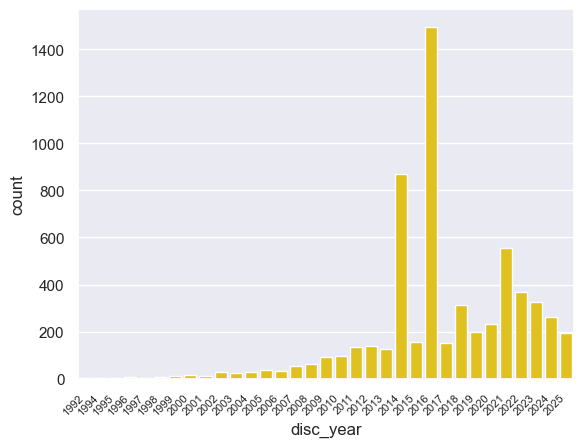

In [ ]:
#Barplot cantidad de planetas descubiertos x año
sns.countplot(x=disc_year, data= discovery_time, color='gold')
plt.xticks(rotation=45, ha='right', fontsize= 8)
plt.show()

##### Los gráficos que le siguen a este corresponden a gráficos de barra múltiple, que comparan la cantidad de exoplanetas descubiertos por año, entre los años 1992 y 2015 a tramos de 5 años (1990-2025), agrupados en barras por el método de descubrimiento utilizado.

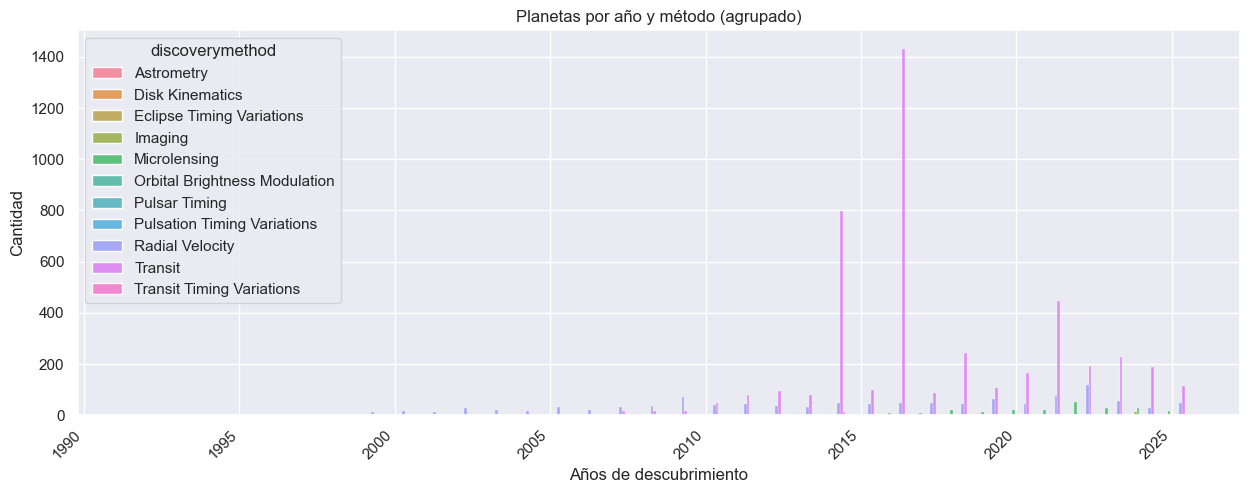

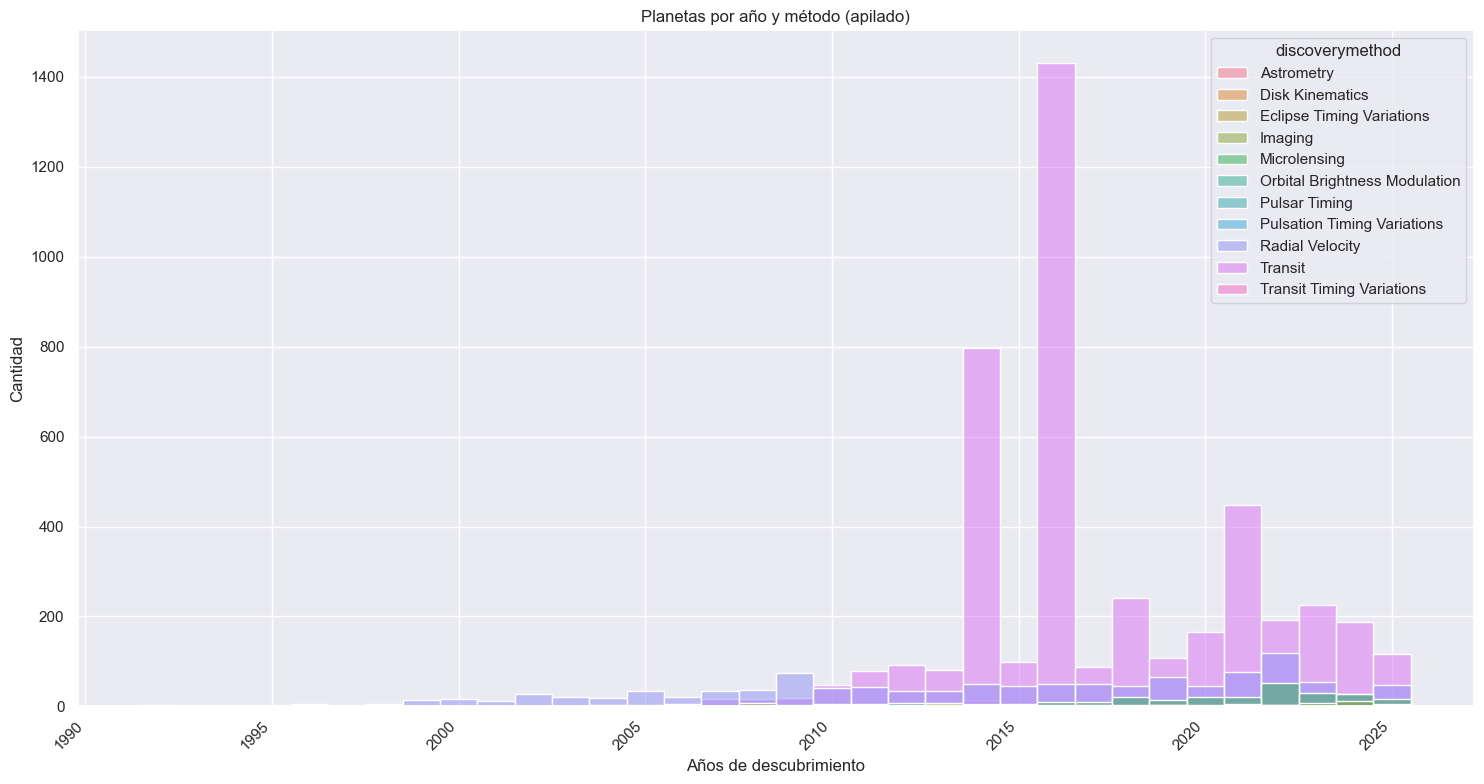

In [223]:
sns.set_theme()

# Graf 1) Barras múltiples (agrupadas)
plt.figure(figsize=(15, 5))
sns.histplot(data=discovery_time, x=disc_year, hue=discoverymethod,
             multiple="dodge", discrete=True, legend=True)
plt.xlabel('Años de descubrimiento'); plt.ylabel('Cantidad')
plt.title('Planetas por año y método (agrupado)'); plt.xticks(rotation=45, ha='right')

plt.show()

# Graf 2) Barras apiladas
plt.figure(figsize=(15,8))
sns.histplot(data=discovery_time, x=disc_year, hue=discoverymethod,
             multiple="layer", discrete=True)
plt.xlabel('Años de descubrimiento'); plt.ylabel('Cantidad')
plt.title('Planetas por año y método (apilado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

#### Gráfico de dispersión :
##### Este gráfico simula la distancia de cada exoplaneta descubierto respecto de la tierra, haciendo uso de las coordenadas celestes

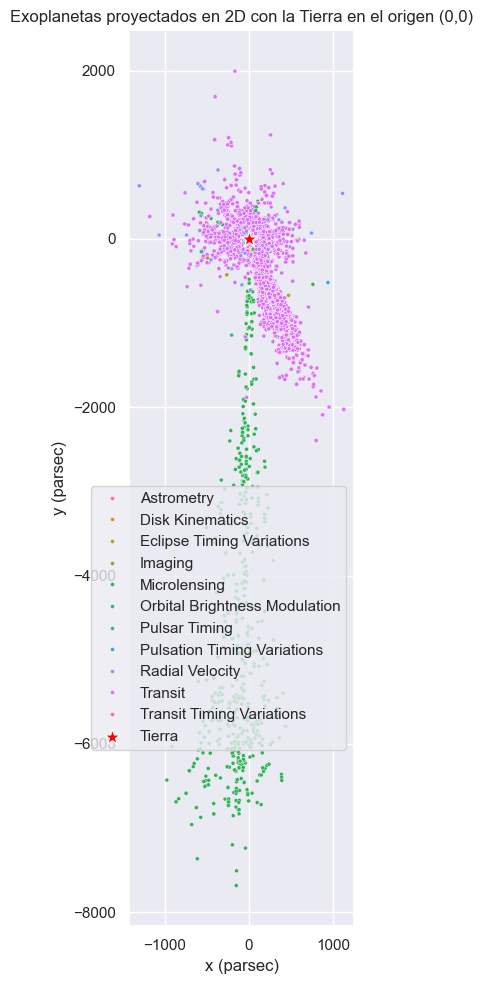

In [215]:
df_exoplanets['x_pc'] = df_exoplanets['sy_dist'] * np.cos(np.deg2rad(df_exoplanets['dec'])) * np.cos(np.deg2rad(df_exoplanets['ra']))
df_exoplanets['y_pc'] = df_exoplanets['sy_dist'] * np.cos(np.deg2rad(df_exoplanets['dec'])) * np.sin(np.deg2rad(df_exoplanets['ra']))

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_exoplanets, x='x_pc', y='y_pc', hue = discoverymethod, s=8, alpha=1)
sns.scatterplot(x=[0], y=[0], color='red', marker='*', s=150, label='Tierra')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Exoplanetas proyectados en 2D con la Tierra en el origen (0,0)')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()